<a href="https://colab.research.google.com/github/alfisuryap/PengolahanCitraDanVisiKomputer/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jobsheet 11: Object Detection**

Nama: Alfi Surya Pratama

NIM: 2141720075

Kelas: TI-3D

Mata Kuliah: Pengolahan Citra dan Visi Komputer

## **Latihan Praktikum**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama“Week11.ipynb”. Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan cara sebagai berikut.

    **Object Detection**

    Metode yang digunakan:
      - Template Matching
      - Edge Detection
      - Corner Detection
      - Grid Detection
      - Contour Detection

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

    **Template Matching**

    Menggunakan library openCV:
    
    **cv.matchTemplate()**, dengan parameter:

      - **image**: citra input
      - **templ**: template yang dicari, ukurannya tidak boleh lebih besar dari citra input
      - **method**: metode dari template matching
    
  Jenis metode template matching di OpenCV:
      - TM_SQDIFF
      - TM_SQDIFF_NORMED
      - TM_CCORR
      - TM_CCORR_NORMED
      - TM_CCOEFF
      - TM_CCOEFF_NORMED

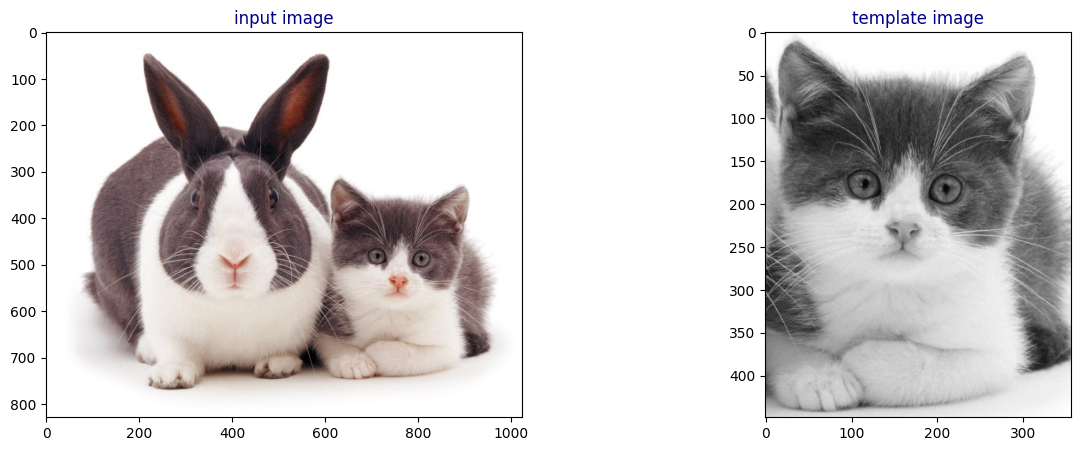

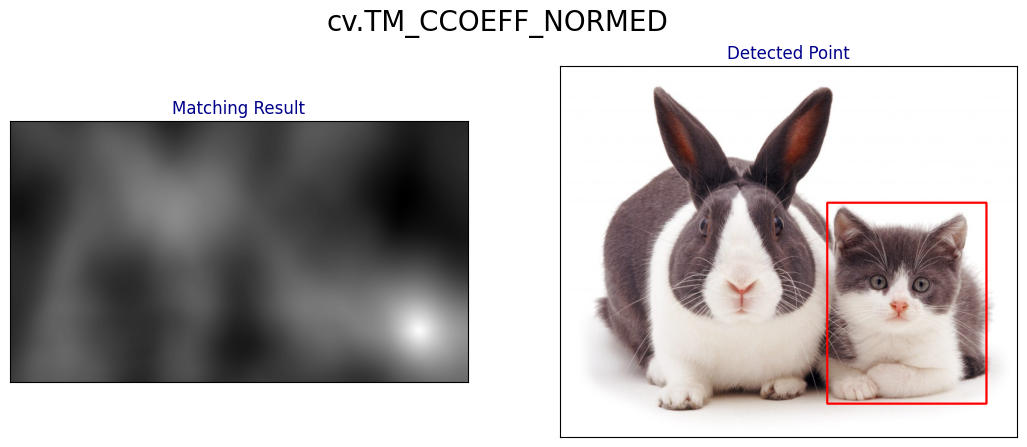

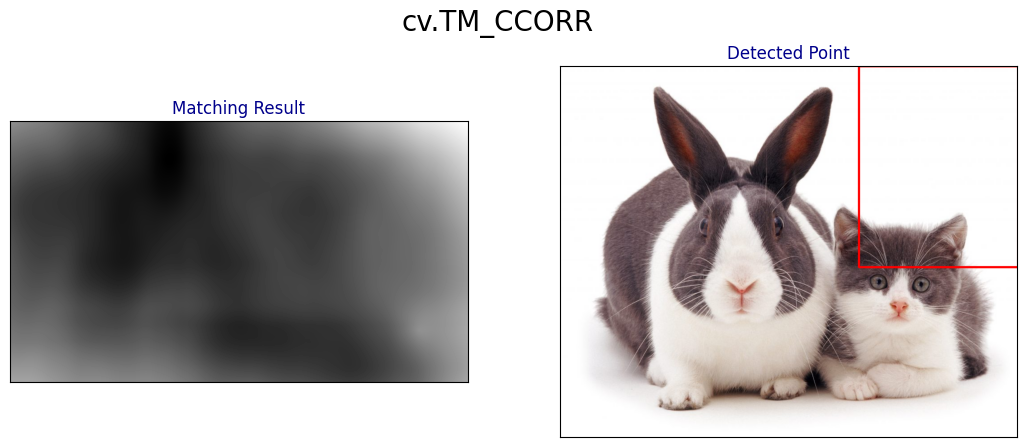

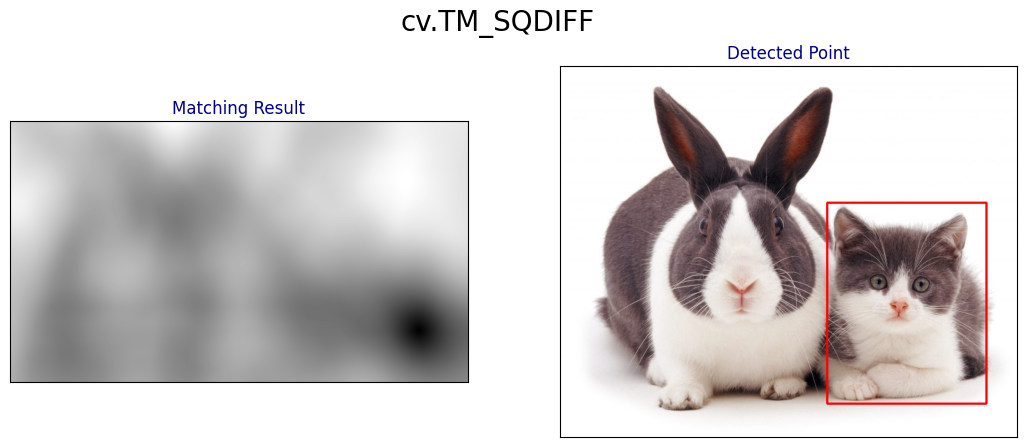

In [ ]:
# load citra input
img = cv.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 11/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 11/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) # membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image", color='darkblue')
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image", color='darkblue')
print("\n\n")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img, top_left, bottom_right,(0,0,255),3)
    plt.figure(figsize=(13,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result', color='darkblue'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point', color='darkblue'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

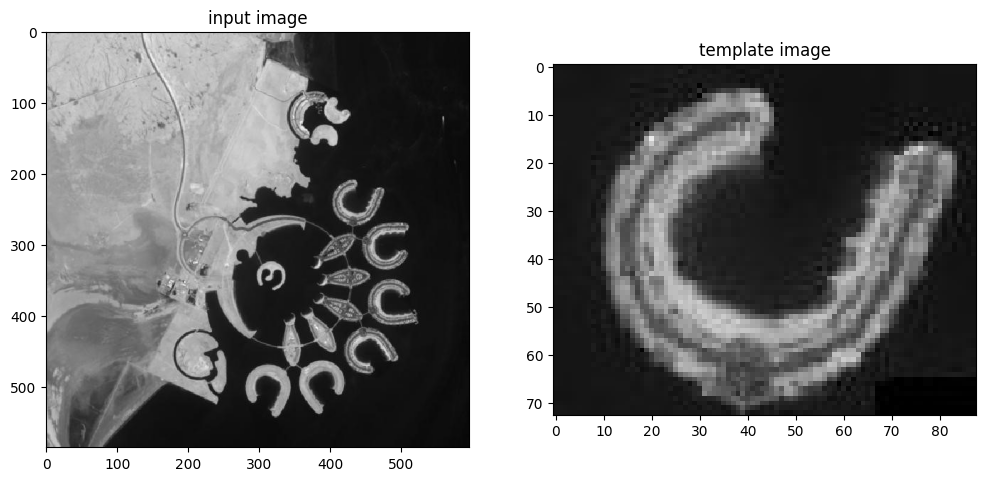

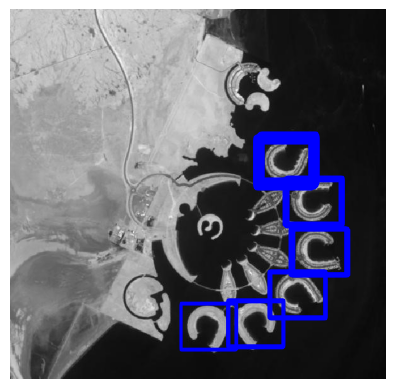

In [ ]:
# nomer 3
from skimage.feature import match_template

img = cv.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 11/bahrain.jpg', 0)
template = cv.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 11/bahrain-template.jpg', 0)

f, axarr = plt. subplots(1,2,figsize=(12,8))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Hitung kemiripan citra dengan citra template
result = match_template(img, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='blue', facecolor='none', linewidth=1)
    ax.add_patch(rect)
plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:

**Sobel Edge Detection**

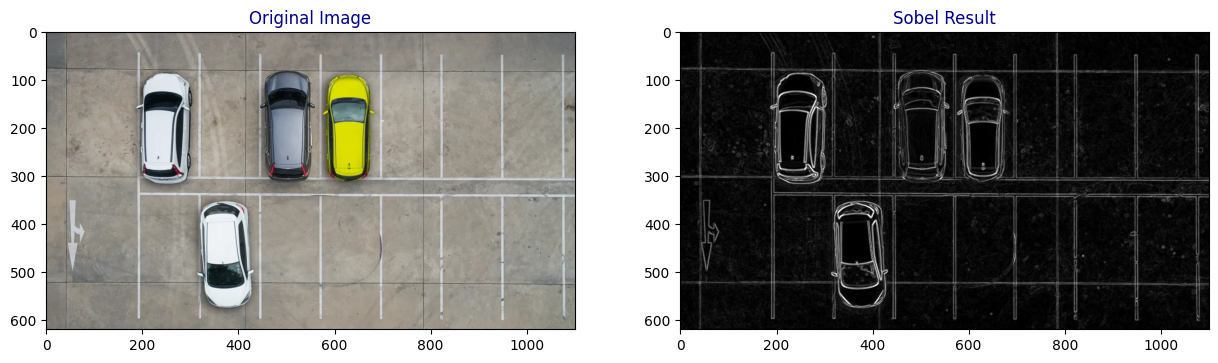

In [ ]:
# Load the image
img_car = cv.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 11/car-park.jpg')

# Convert to grayscale
gray = cv.cvtColor(img_car, cv.COLOR_BGR2GRAY)

# Remove noise
img_n = cv.GaussianBlur(gray, (3, 3), 0)

# Obtain horizontal and vertical Sobel filtering of the image
img_sobelx = cv.Sobel(img_n, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img_n, cv.CV_64F, 0, 1, ksize=3)

# Combine horizontal and vertical Sobel results
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

# Display the original image and the Sobel result
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
plt.title('Original Image', color='darkblue')
plt.imshow(cv.cvtColor(img_car, cv.COLOR_BGR2RGB))

plt.subplot(122)
plt.title('Sobel Result', color='darkblue')
plt.imshow(img_sobelxy, cmap='gray')

plt.show()

**Canny Edge Detection**

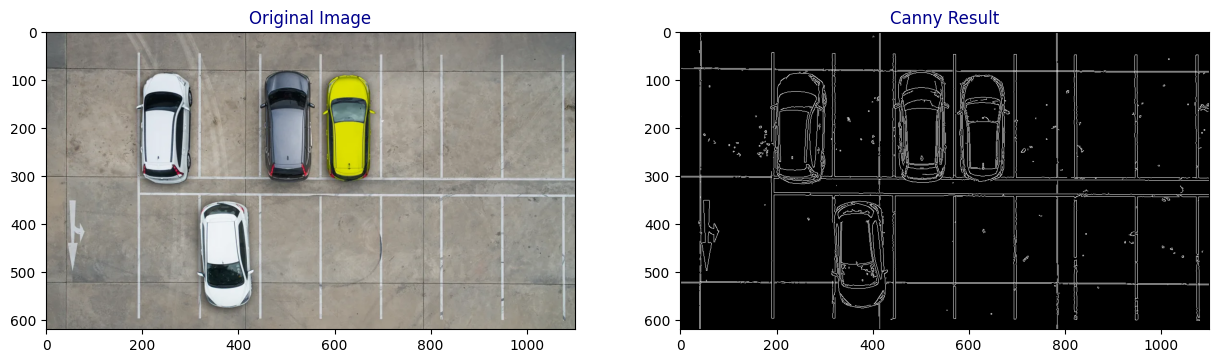

In [ ]:
# nomer 3 (b. Canny Edge Detection)
edged = cv.Canny(img_car, 100, 200)

# Plot outputs
f, axarr = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
plt.title('Original Image', color='darkblue')
plt.imshow(cv.cvtColor(img_car, cv.COLOR_BGR2RGB))

plt.subplot(122)
plt.title('Canny Result', color='darkblue')
plt.imshow(edged, cmap='gray')
plt.show()

**Laplacian Edge Detection**

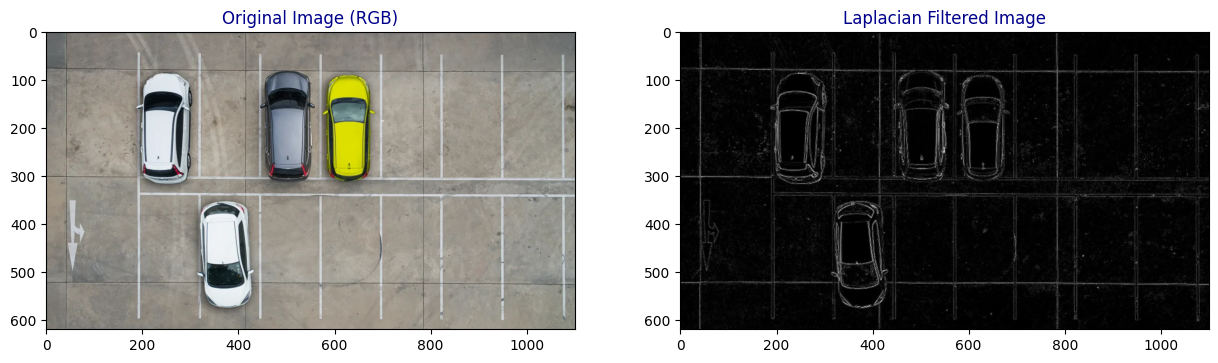

In [ ]:
# Load the image
image_original = cv.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 11/car-park.jpg', cv.IMREAD_COLOR)

# Convert the image to grayscale
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)

# Apply the Laplacian filter
laplacian_filtered_image = cv.Laplacian(image_gray, cv.CV_64F)

# Convert the result to an 8-bit image
laplacian_filtered_image = cv.convertScaleAbs(laplacian_filtered_image)

# Plot the original image and the Laplacian filtered image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
ax1.set_title('Original Image (RGB)', color='darkblue')
ax1.imshow(cv.cvtColor(image_original, cv.COLOR_BGR2RGB))

ax2.set_title('Laplacian Filtered Image', color='darkblue')
ax2.imshow(laplacian_filtered_image, cmap='gray')
plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan luaran sebagai berikut:

**Harris Corner Detection**

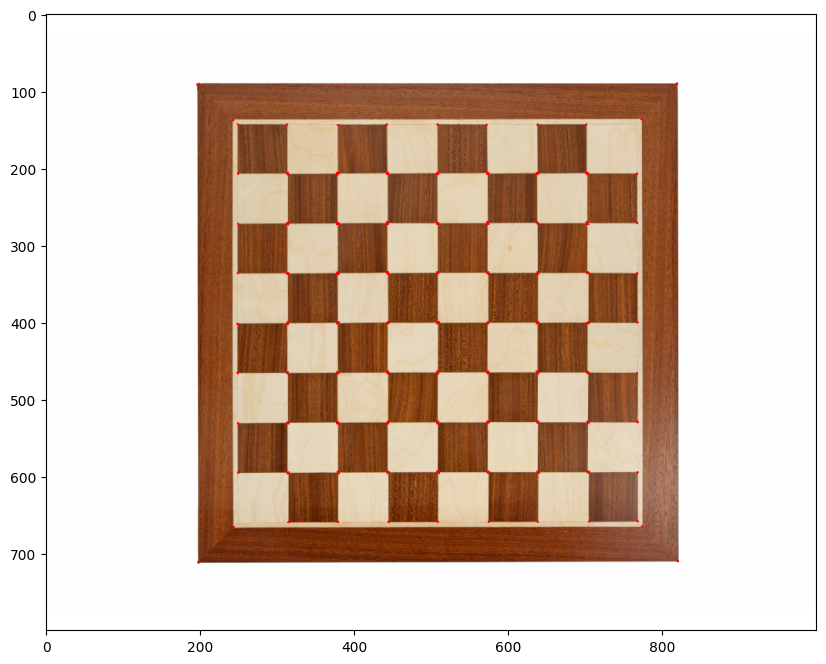

In [ ]:
# Harris Corner Detection
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#load citra input
input_img = cv.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 11/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,8))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

**Shi-Tomasi Detection**

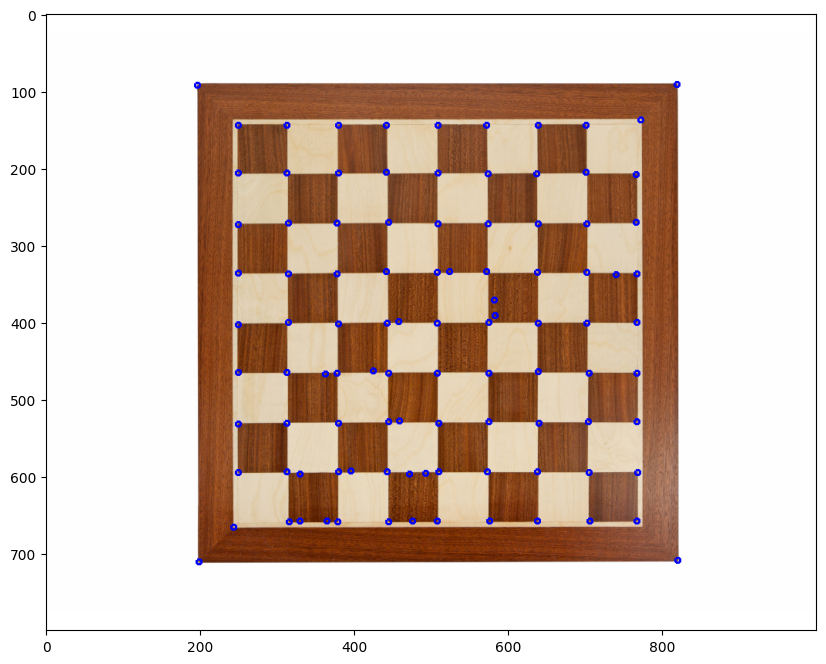

In [ ]:
# Shi-Tomasi Detection
input_img = cv.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 11/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10)
corners = np. int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,8))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


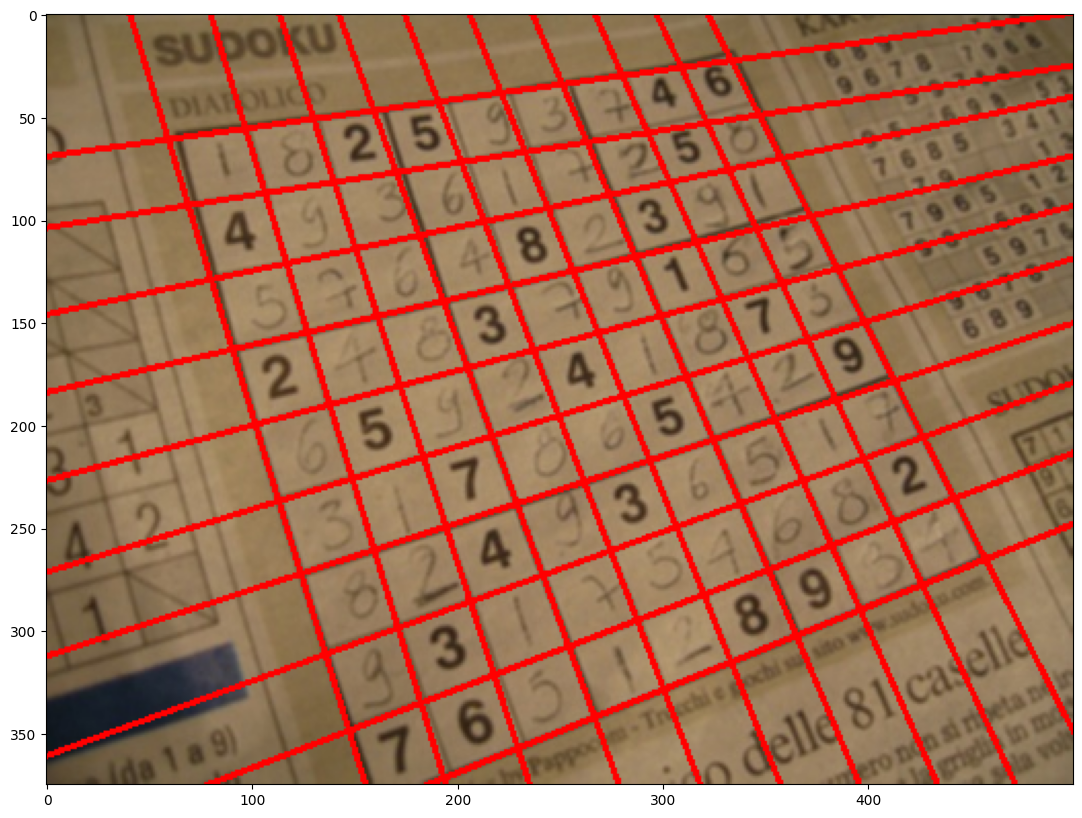

In [ ]:
# nomer 6
input_img = cv.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 11/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

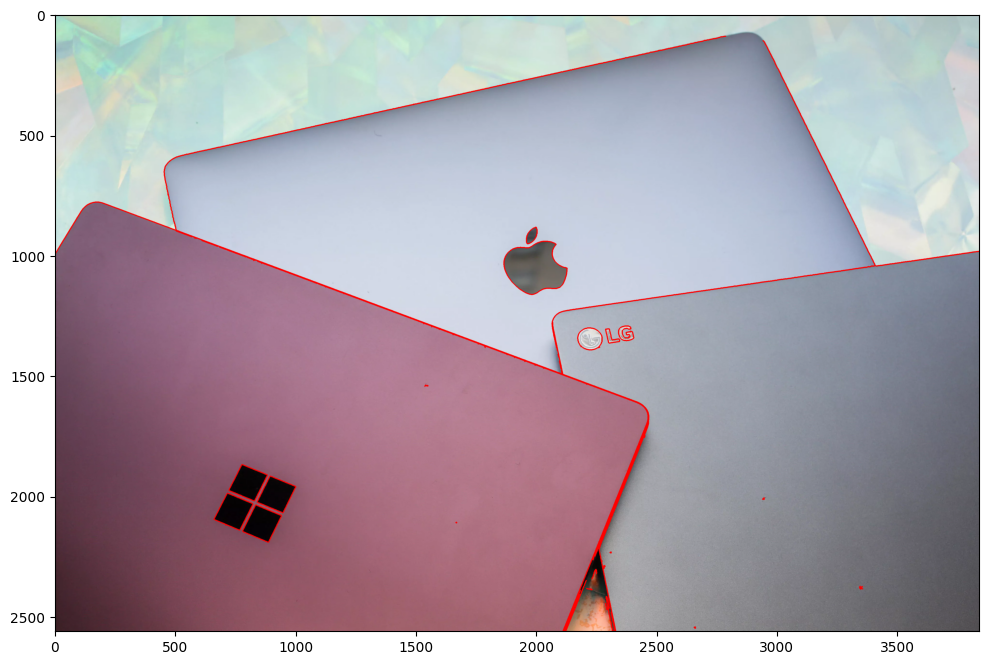

In [ ]:
# nomer 7
img = cv.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 11/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,8))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## **Pengayaan Materi KTP**

1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

2. Muat 2 library berikut sebagai tahapan persiapan

In [35]:
import cv2
import os
from google.colab.patches import cv2_imshow

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

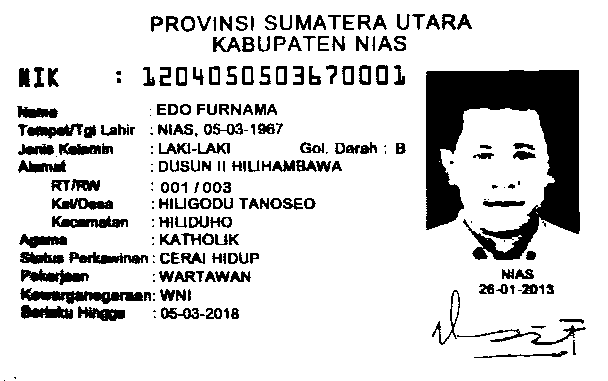

In [42]:
# Lokasi hasil pelat
src = cv.imread("/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 7/KTP_More/ktp5.png")
blurred = cv2.GaussianBlur(src, (5, 5), 0.5)
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(),cv2.getStructuringElement(cv2.MORPH_OPEN,(1,1)))

cv2_imshow(erode)

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).

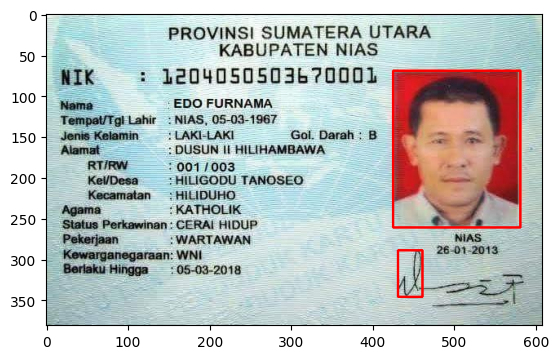

In [38]:
# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# cv.drawContours(ktp, contours, -1, (0, 255, 0), 2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
src_rgb = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src_rgb)
plt.show()

## **Tugas Praktikum**

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan secara berkelompok dengan aturan sebagai berikut:

Kelompok 1 - KTP Riyanto Sleman

Kelompok 2 - KTP Galang Raka Bengkulu

Kelompok 3 - KTP Arief Wijaya Cimahi

Kelompok 4 - KTP Edo Nias

Kelompok 5 - KTP Widiarso Bekasi

Kelompok 6 - KTP Abdurrauf Soppeng

### **Jawab**

In [46]:
import cv2
import os
from google.colab.patches import cv2_imshow

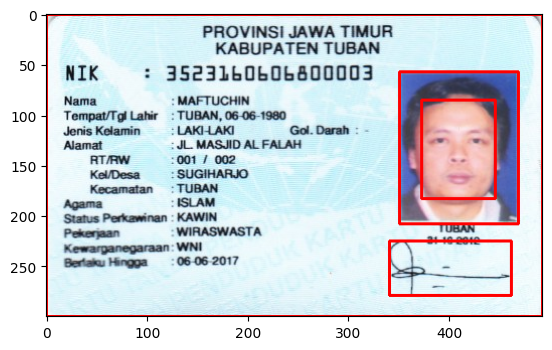

In [50]:
ktp_tugas = cv.imread("/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 7/KTP_More/ktp3.png")

blurred = cv.GaussianBlur(ktp_tugas, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 30 and w >= 5 and float(ras) <= 2:
      cv.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 20 and w >= 5 and float(ras) <= 3:
      cv.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# cv.drawContours(ktp, contours, -1, (0, 255, 0), 2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv.cvtColor(ktp_tugas, cv.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()